# Spam Detector

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [2]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Exploring Data

In [3]:
data.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Columns: 58 entries, word_freq_make to spam
dtypes: float64(55), int64(3)
memory usage: 2.0 MB


In [4]:
data['spam'] = data['spam'].astype('category')

In [5]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


## Split the Data into Training and Testing Sets

In [6]:
# Create the labels set `y` and features DataFrame `X`
copy = data.copy()
X = copy.drop(columns = ['spam'])

y = copy['spam']

In [7]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [8]:
# Split the data into X_train, X_test, y_train, y_test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,stratify = y)

## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [9]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [10]:
# Fit the Standard Scaler with the training data
scaler.fit(X_train)

StandardScaler()

In [11]:
# Scale the training data
X_train = scaler.transform(X_train)

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [12]:
# Train a Logistic Regression model and print the model score
lgr = LogisticRegression(random_state=42)
lgr.fit(X_train,y_train)

print(f'Logistic Regression model score for the training data: {lgr.score(X_train,y_train):.3f} ')

Logistic Regression model score for the training data: 0.929 


In [31]:
# Make and save testing predictions with the saved logistic regression model using the test data
y_pred = lgr.predict(X_test)
# Review the predictions
y_pred

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
print(f'Logistic Regression model accuracy score: {accuracy_score(y_test,y_pred):0.3f}')

Logistic Regression model accuracy score: 0.464


## Confusion Matrix

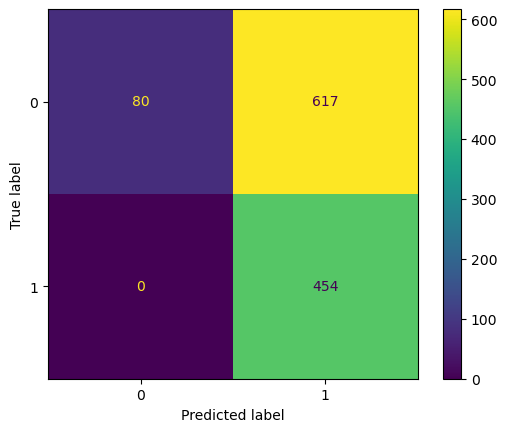

In [33]:
cm = confusion_matrix(y_test,y_pred)

display = ConfusionMatrixDisplay(cm,display_labels = lgr.classes_)
display.plot()

plt.savefig('Resources/lgr_cm.png')
plt.show()


## Classfication Report

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.11      0.21       697
           1       0.42      1.00      0.60       454

    accuracy                           0.46      1151
   macro avg       0.71      0.56      0.40      1151
weighted avg       0.77      0.46      0.36      1151



## ROC-curve AUC 

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


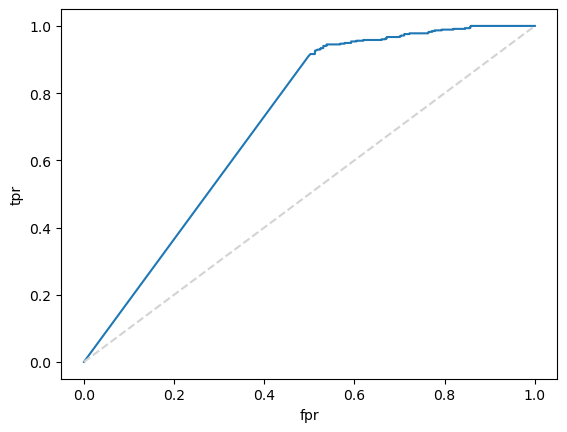

In [29]:
y_proba = lgr.predict_proba(X_test)
preds = y_proba[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

fifty = np.linspace(0,1,10).round(1)
fig,ax = plt.subplots()
ax.plot(fpr,tpr)
ax.plot(fifty,fifty,linestyle='--',color = 'lightgrey')

ax.set_xlabel('fpr')
ax.set_ylabel('tpr')

plt.savefig('Resources/lgr_roc_auc.png')

In [30]:
print(f'The area under the curve for this model is :{roc_auc:0.3f}')

The area under the curve for this model is :0.716


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

## Best n_estimators

In [18]:
training_scores = []
testing_scores = []

for n in range(1,300):
    model = RandomForestClassifier(n_estimators = n,random_state=42)
    model.fit(X_train,y_train)
    
    training_scores.append(model.score(X_train,y_train))
    testing_scores.append(model.score(X_test,y_test))
    

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier 

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier 

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier 

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier 

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier 

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier 

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier 

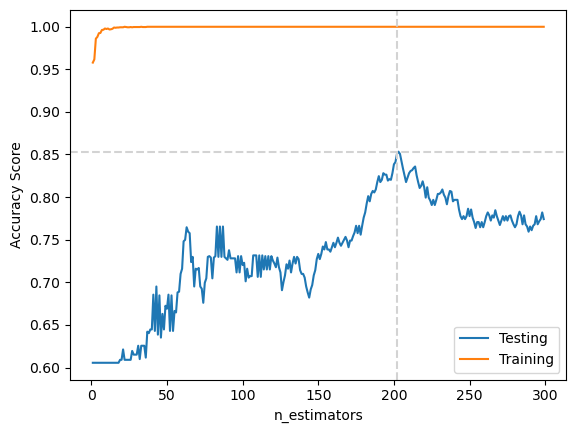

In [34]:
x = np.array([*range(1,300)])
training_scores = np.array(training_scores)
testing_scores = np.array(testing_scores)

n_estimators = np.where(testing_scores == testing_scores.max())[0]

fig,ax = plt.subplots()
ax.plot(x,testing_scores)
ax.plot(x,training_scores)

ax.set_ylabel('Accuracy Score')
ax.set_xlabel('n_estimators')

plt.axhline(testing_scores.max(),
            linestyle = '--',color = 'lightgrey')
plt.axvline(n_estimators[0],
           linestyle = '--',color = 'lightgrey')

plt.legend(['Testing','Training'])

plt.savefig('Resources/rcf_best_estimator.png')

In [20]:
print(f'The Best n_estimator: {n_estimators[0]}')

The Best n_estimator: 202


In [21]:
# Train a Random Forest Classifier model and print the model score
rcf = RandomForestClassifier(n_estimators = n_estimators[0],random_state = 42)
rcf.fit(X_train,y_train)

print(f'Training accuracy score: {rcf.score(X_train,y_train):0.3f}')

Training accuracy score: 1.000


In [35]:
# Make and save testing predictions with the saved logistic regression model using the test data
y_pred = rcf.predict(X_test)

# Review the predictions
y_pred

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [36]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
print(f'Accuracy score: {accuracy_score(y_test,y_pred):0.3f}')

Accuracy score: 0.851


## Confusion Matrix

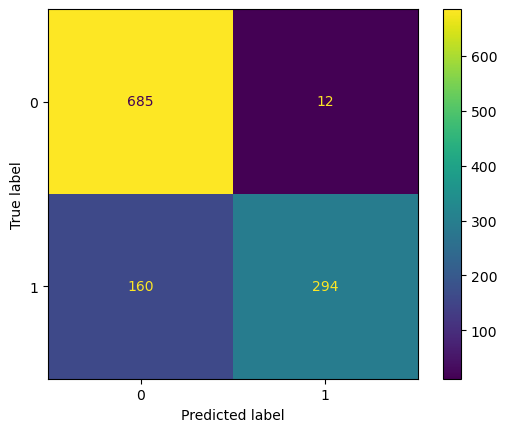

In [37]:
cm = confusion_matrix(y_test,y_pred)

display = ConfusionMatrixDisplay(cm,display_labels = lgr.classes_)
display.plot()
plt.savefig('Resources/rcf_cm.png')
plt.show()

## Classfication Report

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       697
           1       0.96      0.65      0.77       454

    accuracy                           0.85      1151
   macro avg       0.89      0.82      0.83      1151
weighted avg       0.87      0.85      0.84      1151



## ROC-curve AUC

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


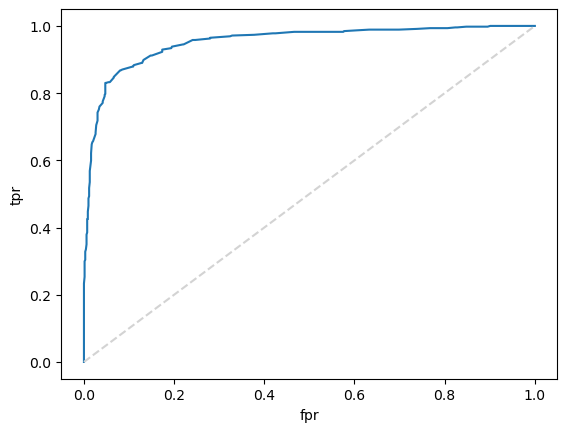

In [38]:
y_proba = rcf.predict_proba(X_test)
preds = y_proba[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

fifty = np.linspace(0,1,10).round(1)
fig,ax = plt.subplots()
ax.plot(fpr,tpr)
ax.plot(fifty,fifty,linestyle='--',color = 'lightgrey')

ax.set_xlabel('fpr')
ax.set_ylabel('tpr')

plt.savefig('Resources/rcf_roc_auc.png')

In [28]:
print(f'The area under the curve for this model is :{roc_auc:0.3f}')

The area under the curve for this model is :0.952


## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

*Replace the text in this markdown cell with your answers to these questions.*

**In this challenge we were tasked with evaluating the performance of a Logistic Regression model and a Random Forest Classifier in trying to predict if an email was spam. After performing a brief exploration of the dataset we noticed that the target variable was slightly unbalanced 60% of the cases were not spam vs. 40% were, with this in mind we then proceeded to generate the models, train and test them on thier training set as well as their testing set.**

### Logistic Regression
**-Accuracy score for training data: 0.929**<br>
**-Accuracy score for testing data: 0.464**

**After examining the accuracy score for the testing set we can clearly see that the model did not perform well, by looking at the confusion matrix and the classification report we can see that the model did well when predicting that email was spam but had a lot of difficulty in detecting when it was not.**

                precision    recall  f1-score   support

           0        1.00      0.11      0.21       697
           1        0.42      1.00      0.60       454

    accuracy                            0.46      1151
    macro avg       0.71      0.56      0.40      1151
    weighted avg    0.77      0.46      0.36      1151

**Finally to guage the overall performance we plotted the ROC curve and calculated the AUC which for this model was of 0.716**



### Random Forest Classifier
**For this model we first determined the most beneficial number of estimators out of 300 possibilities and by looking at the graph we can see that the best n_estimators is 202**

**-n_estimators : 202**<br>
**-Accuracy score for training data: 1.00**<br>
**-Accuracy score for testing data: 0.851**

**After examining the accuracy score for the testing set we see that the model performed better than logistict regression, but to gain better insight to why this is the case we examined the confusion matrix and the classification report.**

                  precision  recall  f1-score   support

           0        0.81      0.98      0.89       697
           1        0.96      0.65      0.77       454

    accuracy                            0.85      1151
    macro avg       0.89      0.82      0.83      1151
    weighted avg    0.87      0.85      0.84      1151

**The report shows that in classifying if the email was spam this model under performed the logistic regression model by 4% but was approximately 40% better at determining when the email was not spam. The overall performance was much improved in this model which had an AUC of 0.952**


**After looking at all the metrics avaliable we determined that the Random Forest classifier was the better model for this application.**